In [1]:
import pandas as pd
import os

# 상위 디렉토리로 이동하여 kmrd 폴더에 접근
data_dir = '../kmrd/kmr_dataset/datafile/kmrd-small'
movie_df = pd.read_csv(os.path.join(data_dir, 'movies.txt'), sep='\t')
# 평점 데이터 로드
rates_df = pd.read_csv(os.path.join(data_dir, 'rates.csv'))
# 출연진 데이터 로드
castings_df = pd.read_csv(os.path.join(data_dir, 'castings.csv'))
# 인물 데이터 로드
peoples_df = pd.read_csv(os.path.join(data_dir, 'peoples.txt'), sep='\t')
# 제작 국가 데이터 로드
countries_df = pd.read_csv(os.path.join(data_dir, 'countries.csv'))
# 장르 데이터 로드
genres_df = pd.read_csv(os.path.join(data_dir, 'genres.csv'))


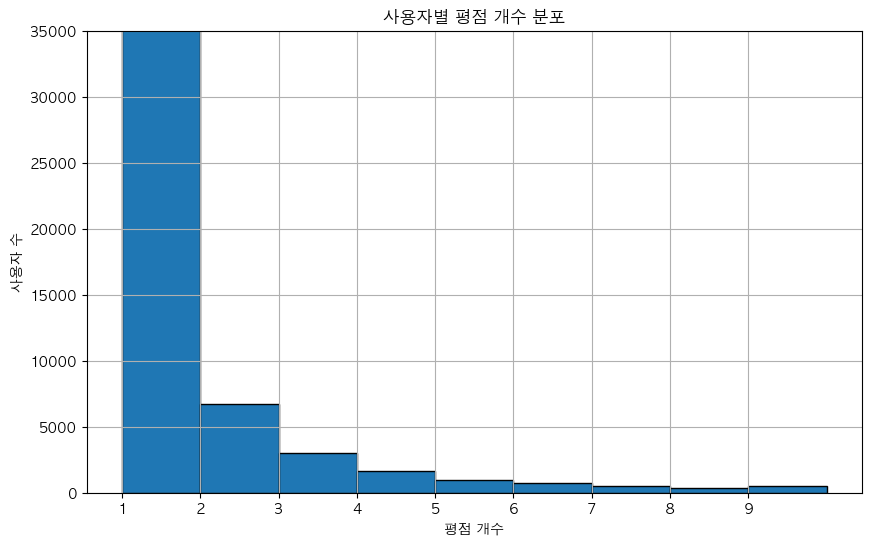

사용자별 평점 개수 통계:
count    52028.000000
mean         2.704505
std          8.010124
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        413.000000
Name: count, dtype: float64


In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc


# 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 사용자별 평점 개수 계산
user_rating_counts = rates_df['user'].value_counts()

# Histogram 생성


# Histogram 생성
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=range(1, 11), edgecolor='black')  # bins를 1-10까지 명시적으로 지정
plt.title('사용자별 평점 개수 분포')
plt.xlabel('평점 개수')
plt.ylabel('사용자 수')
plt.xticks(range(1, 10))
plt.ylim(0, 35000)  # y축 범위 설정
plt.grid(True)
plt.show()
# 사용자별로 몇 개의 영화에 평점을 매겼는지 분석하는 코드



# 기본 통계량 출력
print("사용자별 평점 개수 통계:")
print(user_rating_counts.describe())



/var/folders/g0/9kxlnnwj63x5wy0x6bz3cwkw0000gq/T/ipykernel_46111/3802790270.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ratings = rates_df.set_index('time').resample('M')['rate'].count()


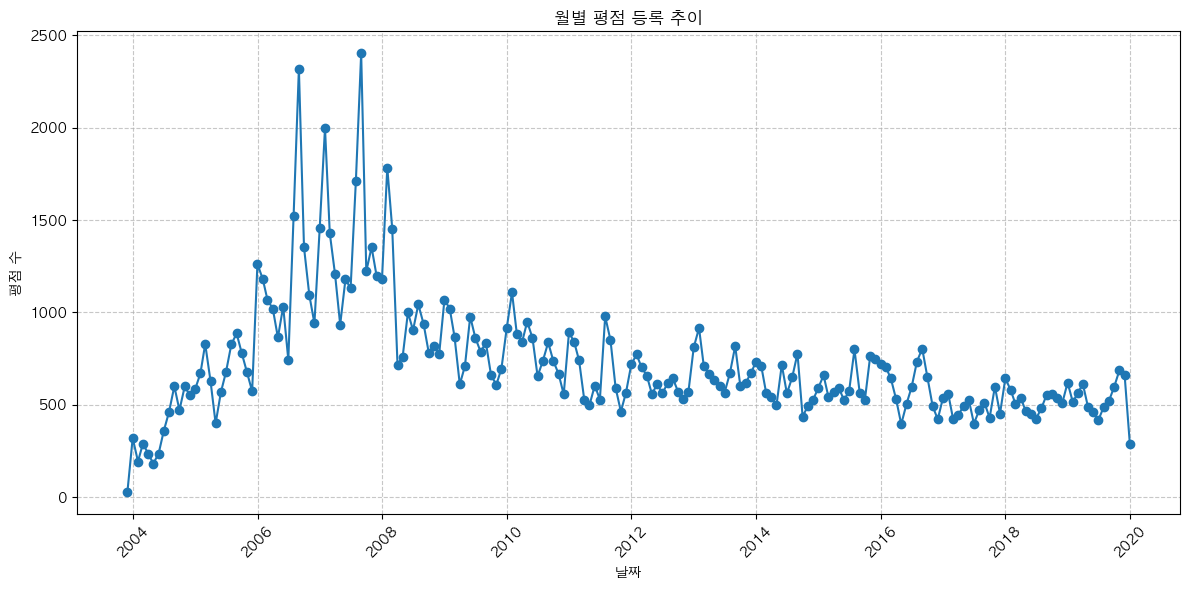


시간 관련 통계:
첫 평점 등록일: 2003-11-20 15:00:00
마지막 평점 등록일: 2019-12-16 19:51:00
전체 기간: 5870일
일평균 평점 수: 23.97


In [9]:

# 시간 데이터를 datetime으로 변환
rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')

# 월별 평점 수 계산
monthly_ratings = rates_df.set_index('time').resample('M')['rate'].count()

# Line plot 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o')

plt.title('년도별 평점 등록 추이')
plt.xlabel('날짜')
plt.ylabel('평점 수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

plt.show()

# 기본 통계량 출력
print("\n시간 관련 통계:")
print(f"첫 평점 등록일: {rates_df['time'].min()}")
print(f"마지막 평점 등록일: {rates_df['time'].max()}")
print(f"전체 기간: {(rates_df['time'].max() - rates_df['time'].min()).days}일")
print(f"일평균 평점 수: {len(rates_df) / (rates_df['time'].max() - rates_df['time'].min()).days:.2f}")


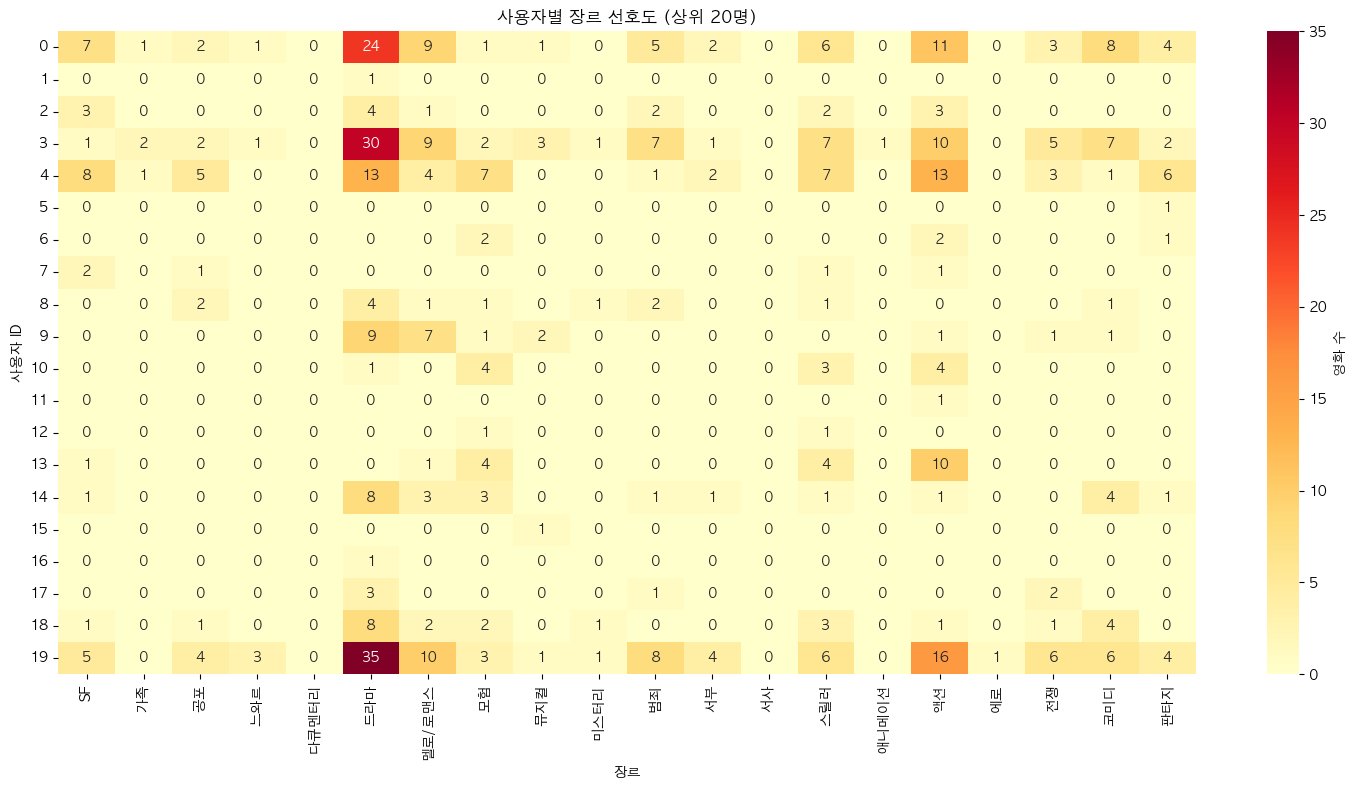


장르별 평균 시청 횟수:
genre
드라마       0.568168
액션        0.343489
멜로/로맨스    0.256842
SF        0.253086
코미디       0.238757
스릴러       0.212873
범죄        0.178803
모험        0.160257
판타지       0.137473
공포        0.101477
가족        0.057701
전쟁        0.054600
뮤지컬       0.039674
서부        0.028600
느와르       0.028369
미스터리      0.025345
애니메이션     0.007203
서사        0.006702
에로        0.001695
다큐멘터리     0.000019
dtype: float64


In [13]:

import seaborn as sns
# movies와 genres 데이터프레임 병합
movie_df = pd.merge(rates_df[['movie']], genres_df, on='movie', how='left')
# 사용자-장르 선호도 분석을 위한 피벗 테이블 생성
genre_preferences = pd.crosstab(rates_df['user'], movie_df['genre'])

# Heatmap 생성
plt.figure(figsize=(15, 8))
sns.heatmap(genre_preferences.head(20), # 상위 20명의 사용자만 표시
            cmap='YlOrRd', # 색상 맵 지정
            annot=True, # 값 표시
            fmt='d', # 정수 형식으로 표시
            cbar_kws={'label': '영화 수'})

plt.title('사용자별 장르 선호도 (상위 20명)')
plt.xlabel('장르')
plt.ylabel('사용자 ID')

# y축 레이블 회전 조정
plt.yticks(rotation=0)

# 레이아웃 조정
plt.tight_layout()

plt.show()

# 전체 장르별 선호도 통계 출력
print("\n장르별 평균 시청 횟수:")
print(genre_preferences.mean().sort_values(ascending=False))
